# Table of Contents

Define a Function that Makes a Graph

Question 1: Use yfinance to Extract Stock Data

Question 2: Use Webscraping to Extract Tesla Revenue Data

Question 3: Use yfinance to Extract Stock Data

Question 4: Use Webscraping to Extract GME Revenue Data

Question 5: Plot Tesla Stock Graph

Question 6: Plot GameStop Stock Graph

Estimated Time Needed: 30 min

In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define Graphing Function
In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard.

**Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**

# **Question 1: Use yfinance to Extract Stock Data**
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA

In [ ]:
tesla = yf.Ticker("TSLA")

In [ ]:
tesla_data = tesla.history(period="max")

In [ ]:
tesla_data.reset_index(inplace=True)
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


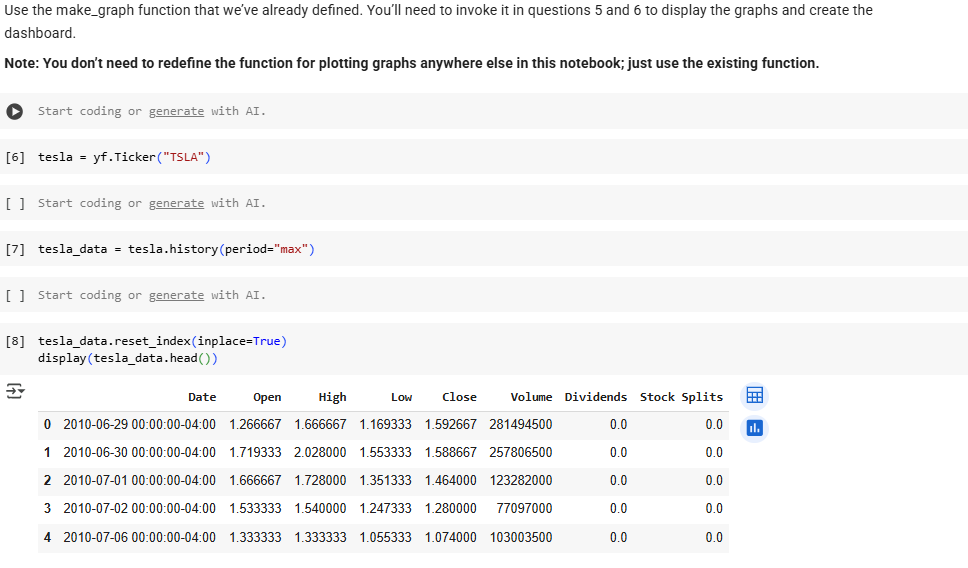

# Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data, "html5lib")

In [ ]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
rows_list = []

# Find the second tbody tag, which contains the revenue data
table = soup.find_all("tbody")[1]

# Iterate through the rows of the table
for row in table.find_all('tr'):
    col = row.find_all('td')

    # Extract Date and Revenue data, handling potential missing columns
    if len(col) > 1:
        date = col[0].text
        revenue = col[1].text.replace('$', '').replace(',', '')  # Clean up revenue string

        # Append the data to the list
        rows_list.append({"Date": date, "Revenue": revenue})

# Concatenate the list of rows to the DataFrame
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(rows_list)], ignore_index=True)

display(tesla_revenue.head())

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [ ]:
display(tesla_revenue.head())

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [ ]:
# Displaying last five rows of tesla_revenue dataframe
display(tesla_revenue.tail())

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# **Question 3: Use yfinance to Extract Stock Data**
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [ ]:
gme = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [ ]:
gme_data = gme.history(period="max")

**Reset the index** using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [ ]:
gme_data.reset_index(inplace=True)
display(gme_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_gme).text

In [ ]:
soup_gme = BeautifulSoup(html_data_2, "html5lib")

In [ ]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
rows_list = []

# Find the second tbody tag, which contains the revenue data
table_gme = soup_gme.find_all("tbody")[1]

# Iterate through the rows of the table
for row in table_gme.find_all('tr'):
    col = row.find_all('td')

    # Extract Date and Revenue data, handling potential missing columns
    if len(col) > 1:
        date = col[0].text
        revenue = col[1].text.replace('$', '').replace(',', '')  # Clean up revenue string

        # Append the data to the list
        rows_list.append({"Date": date, "Revenue": revenue})

# Concatenate the list of rows to the DataFrame
gme_revenue = pd.concat([gme_revenue, pd.DataFrame(rows_list)], ignore_index=True)

# Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)

display(gme_revenue.head())

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [ ]:
# Displaying the last five rows of the gme_data dataframe using the tail function
display(gme_revenue.tail())

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data')

Output hidden; open in https://colab.research.google.com to view.